In [ ]:
import torchvision as tv
import phototour
import torch
from tqdm import tqdm 
import numpy as np
import torch.nn as nn
import math 
import tfeat_model
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import os

#init tfeat and load the trained weights
tfeat = tfeat_model.TNet()
models_path = 'pretrained-models'
net_name = 'tfeat-liberty'
tfeat.load_state_dict(torch.load(os.path.join(models_path,net_name+".params")))
tfeat.cuda()
tfeat.eval()

# Runing `tfeat` with `openCV` for image matching

Below we show how to use the `openCV` pipeline to match two images using `TFeat`.

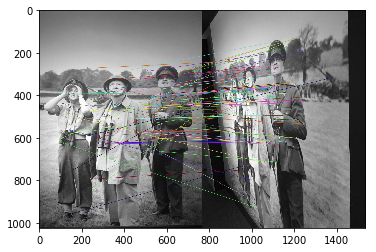

(<matplotlib.image.AxesImage at 0x7f72bd4330f0>, None)

In [4]:
import cv2
import tfeat_utils
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('imgs/v_churchill/1.ppm',0) 
img2 = cv2.imread('imgs/v_churchill/6.ppm',0)

brisk = cv2.BRISK_create()
kp1, des1 = brisk.detectAndCompute(img1,None)
kp2, des2 = brisk.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,0, flags=2)
plt.imshow(img3),plt.show()

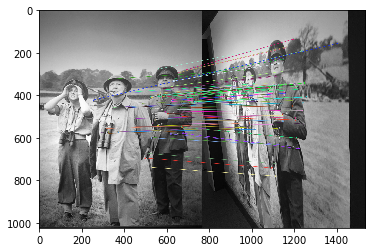

(<matplotlib.image.AxesImage at 0x7f72bd417b70>, None)

In [3]:
# mag_factor is how many times the original keypoint scale
# is enlarged to generate a patch from a keypoint
mag_factor = 3
desc_tfeat1 = tfeat_utils.describe_opencv(tfeat, img1, kp1, 32,mag_factor)
desc_tfeat2 = tfeat_utils.describe_opencv(tfeat, img2, kp2, 32,mag_factor)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(desc_tfeat1,desc_tfeat2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,0, flags=2)

plt.imshow(img3),plt.show()

# Runing `tfeat` with `vl_feat` for image matching

*Coming soon...*

# Runing `tfeat` on `HPatches`

*Coming soon...*

# Real time tracking demo

*Coming soon...*